In [140]:
import warnings
from numpy import linalg as LA
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
warnings.filterwarnings('ignore')
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression



In [12]:
def standardize(df1):
    scaler = StandardScaler()
    df1 = scaler.fit_transform(df1)
    return pd.DataFrame(df1)


# PCA

In [14]:
def pca_func(data, n):
    pca = PCA(n_components=n, svd_solver='full')

    pca = pca.fit(data)
    df_pca = pca.transform(data)
    df_new = pca.inverse_transform(df_pca)
    # C=pd.DataFrame(data).corr()
    # W,V=LA.eig(C)

    # fig,axes = plt.subplots(1,2,figsize=[15,6])
    # axes[0].plot(np.linspace(0,pca.n_components_,pca.n_components_),W,':o',color='k')
    # axes[0].set_xlabel('Principal components')
    # axes[0].set_ylabel('Eigenvalues')
    # axes[0].set_title('Scree Plot')
    # axes[0].grid(True)
    # ref: https://blogs.sas.com/content/iml/2019/11/04/interpret-graphs-principal-components.html

    print('Components Explained Variance:', pca.explained_variance_ratio_*100)
    print('Total variance explained:', np.sum(
        pca.explained_variance_ratio_*100))
    print('Components:')
    print(pca.components_)
    plt.plot(np.linspace(0, pca.n_components_, pca.n_components_),
             pca.explained_variance_ratio_*100, ':o', color='k')
    plt.plot(np.linspace(0, pca.n_components_, pca.n_components_), np.cumsum(
        pca.explained_variance_ratio_*100), '--*', label='Cumulative', color='cyan')
    plt.xlabel('Principal components')
    plt.ylabel('Explained Variance Percentage')
    plt.title('Explained variance wrt principal components')
    plt.legend()
    plt.grid(True)

    # Calculate error
    rmse = mse(data, df_new, squared=False)
    print('RMSE between original and regained data after PCA: ', rmse)

    r2 = r2_score(data, df_new)

    print('R2_score between original and regained data after PCA: ', r2)


In [15]:
data_d = pd.read_csv('BoneCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('BoneCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('BoneCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('BoneCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('BoneCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('BoneCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')


In [22]:
data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')

data


,Name,Betweenness,Degree,Closeness,EigenValueC,Khatz,ClusteringCoef
0,4EBP1,0.001357,0.011429,0.319635,0.005645,0.005320,0.000000
1,AKT1,0.020517,0.074286,0.395480,0.060176,0.038186,0.089231
2,CCND1,0.012563,0.048571,0.386740,0.027407,0.017079,0.102941
3,MAPK14,0.032367,0.074286,0.415677,0.053260,-0.001147,0.107692
4,TFDP1,0.000110,0.008571,0.282943,0.001388,0.024018,0.333333
...,...,...,...,...,...,...,...
346,UBCH5C,0.001983,0.008571,0.300946,0.004482,-0.013445,0.000000
347,USP9,0.000309,0.008571,0.291910,0.001601,-0.004059,0.333333
348,YES,0.003636,0.025714,0.359343,0.051518,0.015572,0.472222
349,ZIN,0.001424,0.008571,0.321987,0.009443,-0.010308,0.000000


In [23]:
cols = ['Betweenness', 'Closeness', 'Degree', 'EigenValueC', 'Khatz', 'ClusteringCoef']
df_temp = data[cols]
df_temp = standardize(df_temp)


Components Explained Variance: [54.75137548 18.08383149 16.65171041  5.57764912  4.37376727  0.56166623]
Total variance explained: 100.0
Components:
[[ 0.45621385  0.4891099   0.54085645  0.49706602  0.00123675  0.11418657]
 [ 0.26972748 -0.04516256  0.03379922 -0.05040561 -0.50001171 -0.81945873]
 [ 0.22327512  0.01320776  0.06484762 -0.19145805  0.85021505 -0.43156314]
 [ 0.73257149 -0.46924066  0.0447818  -0.33826692 -0.08983559  0.34445879]
 [-0.12297497 -0.72401211  0.20188989  0.62891754  0.11763289 -0.10270994]
 [-0.34275413 -0.1190675   0.81201094 -0.45140523 -0.07220248 -0.00094213]]
RMSE between original and regained data after PCA:  3.337835207092455e-16
R2_score between original and regained data after PCA:  1.0


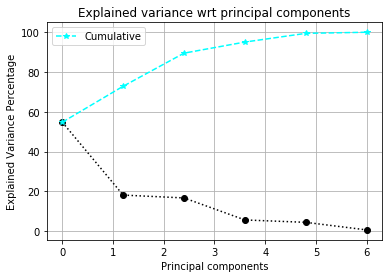

In [25]:
pca_func(df_temp, 6)


# Generating labels

In [141]:
original = pd.read_excel('list_for_classification_500.xlsx')
original_bone = original['BONE']
original_breast = original['BREAST']
original_liver = original['LIVER']
original_kidney = original['KIDNEY']
original_colon = original['COLON']

In [148]:
def get_labels(original_data,df,filename):
    labels = []
    for i in range(len(df)):
        if df['Name'][i] in original_data.to_list():
            labels.append(1)
        else:
            labels.append(0)
    labels = pd.DataFrame(labels, columns=['Label'])
    df = pd.concat([df, labels], axis=1)
    filename = ("LabelledData" + str(filename) + ".csv")
    df.to_csv(filename, index=False)

# Labelling files

In [159]:
data_d = pd.read_csv('BoneCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('BoneCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('BoneCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('BoneCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('BoneCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('BoneCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')

data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')
get_labels(original_bone,data,'\Bone-Cancer')


In [157]:
data_d = pd.read_csv('BreastCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('BreastCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('BreastCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('BreastCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('BreastCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('BreastCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')

data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')
get_labels(original_breast,data,'\Breast-Cancer')


In [154]:
data_d = pd.read_csv('LiverCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('LiverCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('LiverCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('LiverCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('LiverCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('LiverCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')

data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')
get_labels(original_liver,data,'\Liver-Cancer')


In [173]:
data_d = pd.read_csv('KidneyCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('KidneyCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('KidneyCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('KidneyCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('KidneyCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('KidneyCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')

data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')

get_labels(original_kidney,data,'\Kidney-Cancer')


In [174]:
data_d = pd.read_csv('ColonCancer_degreecentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Degree'}, axis='columns')
data_c = pd.read_csv('ColonCancer_closenesscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Closeness'}, axis='columns')
data_b = pd.read_csv('ColonCancer_betweennessscentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Betweenness'}, axis='columns')
data_e = pd.read_csv('ColonCancer_eigenvectorcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'EigenValueC'}, axis='columns')
data_k = pd.read_csv('ColonCancer_khatzcentrality.csv').rename(
    {'col1': 'Name', 'col2': 'Khatz'}, axis='columns')
data_C = pd.read_csv('ColonCancer_clusteringCentrality.csv').rename(
    {'col1': 'Name', 'col2': 'ClusteringCoef'}, axis='columns')

data = pd.merge(left=data_b, right=data_d, on='Name')
data = pd.merge(left=data, right=data_c, on='Name')
data = pd.merge(left=data, right=data_e, on='Name')
data = pd.merge(left=data, right=data_k, on='Name')
data = pd.merge(left=data, right=data_C, on='Name')

get_labels(original_colon,data,'\Colon-Cancer')


# Feature importance

In [175]:
def get_feature_importance_plots(data):
    X_train = data[data['Label'] == 1][['Betweenness', 'Degree','Closeness', 'EigenValueC', 'Khatz', 'ClusteringCoef']]
    y_train = data[data['Label'] == 1]['Label']
    count = len(y_train)
    X_train = X_train.append(data[data['Label'] == 0][['Betweenness', 'Degree', 'Closeness', 'EigenValueC', 'Khatz', 'ClusteringCoef']][:len(X_train)])
    y_train = y_train.append(data[data['Label'] == 0]['Label'][:len(y_train)])

    print('Number of common proteins',count)
    X_train_scaled = standardize(X_train)


    print('XGBoost Classifier')
    model = XGBClassifier()
    model.fit(X_train_scaled, y_train)
    importances = pd.DataFrame(data={
        'Attribute': X_train.columns,
        'Importance': model.feature_importances_
    })
    importances = importances.sort_values(by='Importance', ascending=False)
    plt.bar(x=importances['Attribute'],
            height=importances['Importance'], color='#087E8B')
    plt.title('Feature importances obtained from coefficients', size=20)
    plt.xticks(rotation='vertical')
    plt.show()


    print('LogisticRegression Feature Importance')
    model = LogisticRegression()
    model.fit(X_train_scaled,y_train)
    importances = pd.DataFrame(data={
        'Attribute': X_train.columns,
        'Importance': model.coef_[0]
    })
    importances = importances.sort_values(by='Importance', ascending=False)
    plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
    plt.title('Feature importances obtained from coefficients', size=20)
    plt.xticks(rotation='vertical')
    plt.show()
    # y_pred = model.predict(X_test)
    # accuracy_score(y_test,y_pred)


# Feature plots

Number of common proteins 39
XGBoost Classifier


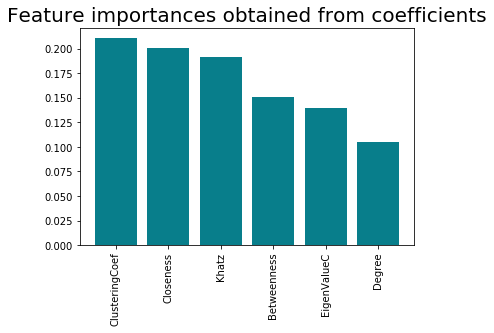

LogisticRegression Feature Importance


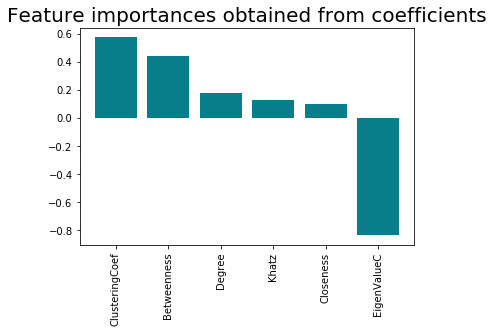

In [176]:
data = pd.read_csv('LabelledData\Bone-Cancer.csv')
get_feature_importance_plots(data)

Number of common proteins 92
XGBoost Classifier


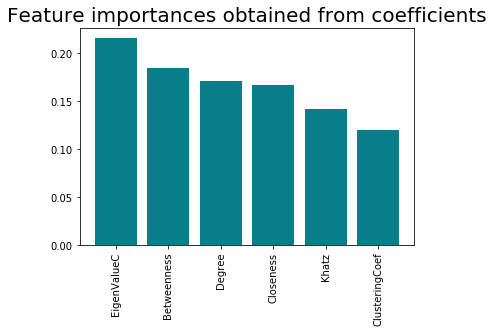

LogisticRegression Feature Importance


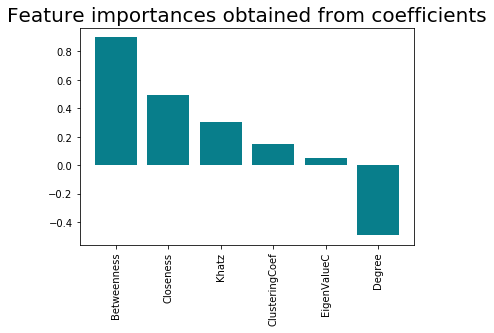

In [177]:
data = pd.read_csv('LabelledData\Breast-Cancer.csv')
get_feature_importance_plots(data)

Number of common proteins 86
XGBoost Classifier


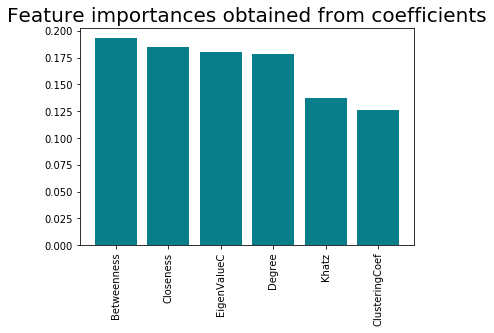

LogisticRegression Feature Importance


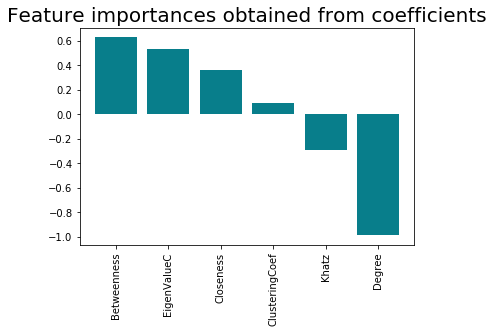

In [178]:
data = pd.read_csv('LabelledData\Liver-Cancer.csv')
get_feature_importance_plots(data)

Number of common proteins 70
XGBoost Classifier


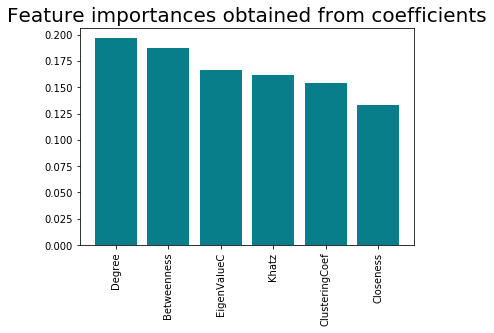

LogisticRegression Feature Importance


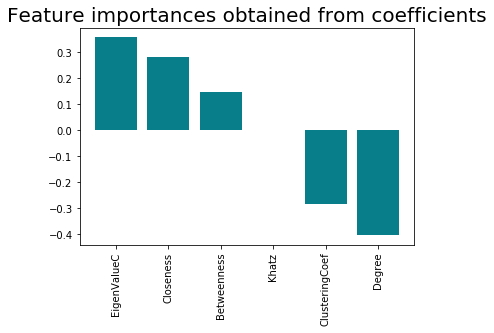

In [179]:
data = pd.read_csv('LabelledData\Kidney-Cancer.csv')
get_feature_importance_plots(data)

Number of common proteins 84
XGBoost Classifier


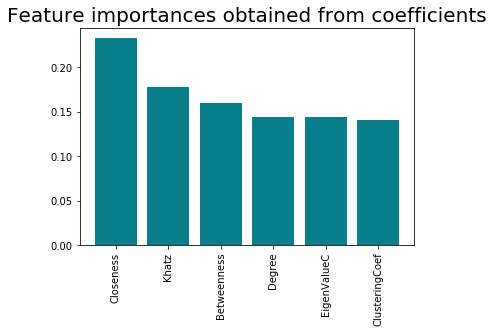

LogisticRegression Feature Importance


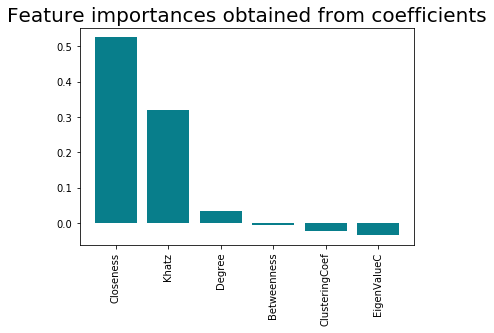

In [180]:
data = pd.read_csv('LabelledData\Colon-Cancer.csv')
get_feature_importance_plots(data)